https://www.datacamp.com/courses/pandas-foundations
# 1. Visual exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('datasets/Iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

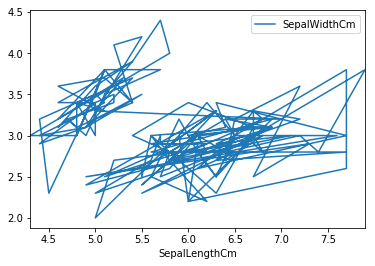

In [4]:
iris.plot(x='SepalLengthCm', y='SepalWidthCm')
plt.show()

## Use of kind='scatter' in DataFrame.plot( ). kind values also include 'box', 'hist'.

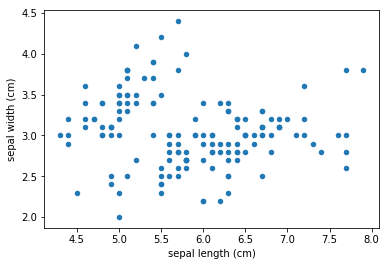

In [5]:
iris.plot(x='SepalLengthCm', y='SepalWidthCm', kind='scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Box plot: the whiskers, the interquartile range with the box edges, and the median inside.

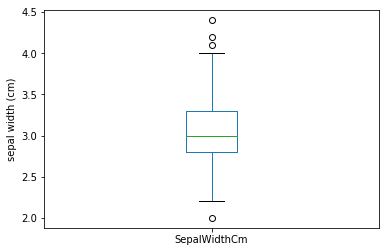

In [6]:
iris.plot(y='SepalWidthCm', kind='box')
plt.ylabel('sepal width (cm)')
plt.show()

### Histogram
- range(tuple): extrema of bins (min, max)
- normed (boolean): whether to normalize to 1
- cumulative (boolean): compute cumulative distribution function (CDF)

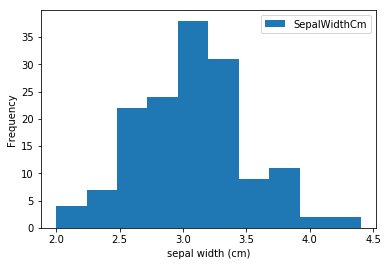

In [7]:
iris.plot(y='SepalWidthCm', kind='hist')
plt.xlabel('sepal width (cm)')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


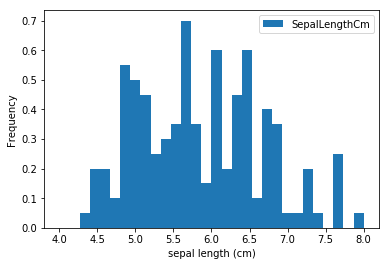

In [8]:
iris.plot(y='SepalLengthCm', kind='hist', bins=30, range=(4, 8), normed=True)
plt.xlabel('sepal length (cm)')
plt.show()

### Cumulative distribution: used to compute the probability of observing a value in a given range.

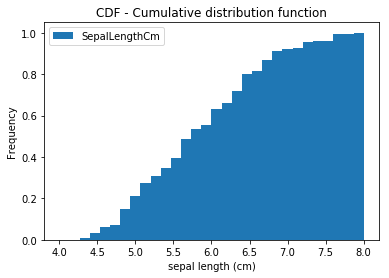

In [9]:
iris.plot(y='SepalLengthCm', kind='hist', bins=30, range=(4,8), cumulative=True, normed=True)
plt.xlabel('sepal length (cm)')
plt.title('CDF - Cumulative distribution function')
plt.show()

## Note: 3 ways of plotting histograms
- iris.plot(kind='hist')
- iris.plt.hist( )
- iris.hist( )

# Practice 1

In [10]:
stock = pd.read_csv('new_stock.csv')
stock.head()

,month,MSFT,GOOGLE,APPLE
0,Jan,45.51,512.42,110.64
1,Feb,43.08,537.99,125.43
2,Mar,42.13,559.72,125.97
3,Apr,43.47,540.50,127.29
4,May,47.53,535.24,128.76


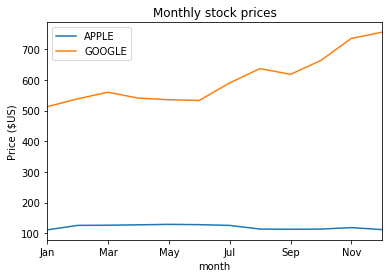

In [11]:
stock.plot(x='month', y=['APPLE', 'GOOGLE'])
plt.title('Monthly stock prices')
plt.ylabel('Price ($US)')
plt.show()

In [12]:
auto = pd.read_csv('datasets/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,blue,15.0
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,blue,20.0
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,red,10.0
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,blue,15.0
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,green,10.0


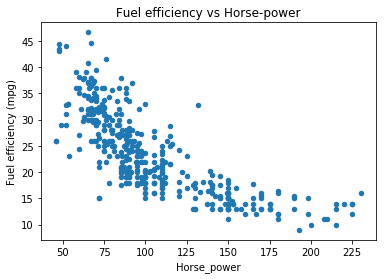

In [13]:
auto.plot(x='hp', y='mpg', kind='scatter')
plt.title('Fuel efficiency vs Horse-power')
plt.xlabel('Horse_power')
plt.ylabel('Fuel efficiency (mpg)')
plt.show()

- subplots=True: will make the plot into 2 separate plots
- Series.plt(kind='', subplots=True)
- auto[['column1', 'column2']]: if we want to choose 2 columns, df[[ ]].

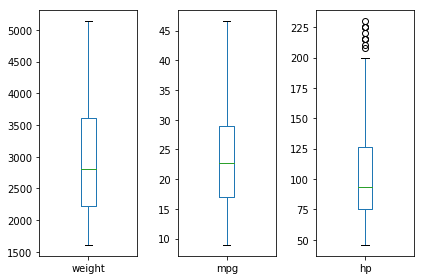

In [14]:
auto[['weight', 'mpg', 'hp']].plot(kind='box', subplots=True)
plt.tight_layout()
plt.show()

In [15]:
tips = pd.read_csv('datasets/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### fig, axes = plt.subplots(nrows=#, ncols=#): nrows is # of rows, ncols is # of columns. 
- ax=axes[0]: the 1st plot
- PDF plot: when 'normed=True'
- CDF plot: when both 'normed=True' & 'cumulative=True'

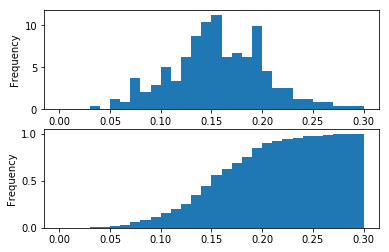

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1)
tips.fraction.plot(ax=axes[0], kind='hist', bins=30, normed=True, range=(0,.3))

tips.fraction.plot(ax=axes[1], kind='hist', bins=30, normed=True, cumulative=True, range=(0, .3))
plt.show()

# 2. Statistical Exploratory Data Analysis
- df[''].mean( ): applied to Series
- df.mean: applied to entire DataFrame

In [17]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


### Again, if we want to choose 2 or more columns, we need to use [['  ']].

In [18]:
iris.SepalLengthCm.count()

150

In [19]:
iris[['SepalLengthCm', 'SepalWidthCm']].count()

SepalLengthCm    150
SepalWidthCm     150
dtype: int64

In [20]:
type(iris[['SepalLengthCm', 'SepalWidthCm']].count())

pandas.core.series.Series

In [21]:
iris[['SepalLengthCm', 'SepalWidthCm']].head()

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [22]:
type(iris[['SepalLengthCm', 'SepalWidthCm']])

pandas.core.frame.DataFrame

In [23]:
# Averages
iris.mean()

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

In [24]:
iris['SepalLengthCm'].mean()

5.843333333333335

In [25]:
iris.std()

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64

In [26]:
iris.median()

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

### The qth quantile of a dataset is a numerical value that splits the data into 2 sets. Colloquially, quantiles are called percentiles using percentages between 0&100, rather than fraction 0&1.
### The quantile method also accepts a list or array of values between 0&1.

In [27]:
q=0.5
iris.quantile(q)

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
Name: 0.5, dtype: float64

### IQR: Inter-quartile range. Below returns the inter-quartile range between 1 quarter and 3-quarter quantiles, telling us half the data collected lies in this range.

In [28]:
q = [.25, .75]
iris.quantile(q)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


### Ranges
- df.min( )
- df.max( )

In [29]:
iris.min()

SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [30]:
iris.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

### Box plots

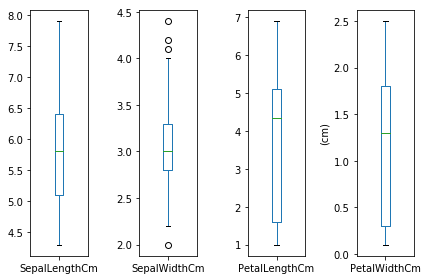

In [31]:
iris.plot(kind='box', subplots=True)
plt.ylabel('(cm)')
plt.tight_layout()

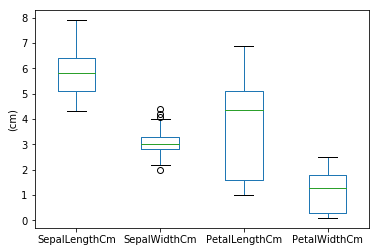

In [32]:
iris.plot(kind='box')
plt.ylabel('(cm)')
plt.show()

In [33]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Practice 2

In [34]:
auto.mpg.median()

22.75

In [35]:
degree = pd.read_csv('datasets/percent-bachelors-degrees-women-usa.csv',index_col='Year')
degree.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


### Below is the mean percentage per year. As the 'Year' is the index of the DataFrame, it will appear on the x-axis of the plot.

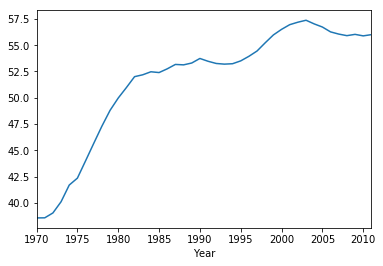

In [36]:
degree.mean(axis='columns').plot()
plt.show()

In [37]:
tat = pd.read_csv('datasets/titanic.csv')
tat.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


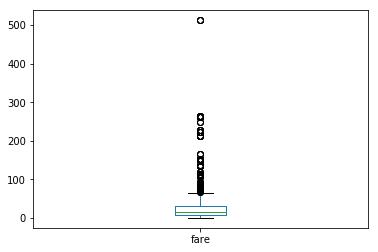

In [38]:
tat.fare.plot(kind='box')
plt.show()

In [39]:
gap = pd.read_csv('datasets/gapminder.csv')
gap.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [40]:
gap.max()

Country                         Åland
Year                             2013
fertility                       9.223
life                            83.58
population                1.35937e+09
child_mortality                 435.8
gdp                            182668
region             Sub-Saharan Africa
dtype: object

In [43]:
life = pd.read_csv('datasets/life_expectancy_at_birth.csv')
life.head()

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [46]:
life['2015'].count()

208

In [47]:
life.quantile([0.05, 0.95])

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,12.95,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,246.05,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


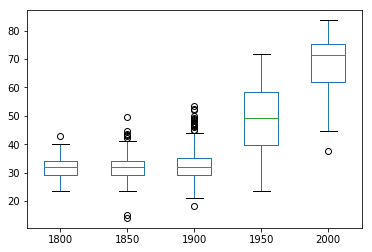

In [50]:
life[['1800', '1850', '1900','1950','2000']].plot(kind='box')
plt.show()

In [51]:
life['2015'].mean()

72.32100961538464

In [52]:
life['2015'].std()

7.9020196427679

# 3. Separating populations

In [53]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


- top: means most frequent category
- freq: means the occurrences of top

In [54]:
iris.Species.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [55]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 1) Filtering by species

In [61]:
series_setosa = iris.Species == 'Iris-setosa'
type(df_setosa)

pandas.core.series.Series

In [62]:
series_setosa.head()

Id
1    True
2    True
3    True
4    True
5    True
Name: Species, dtype: bool

### extract new DataFrame with species of setosa only:

In [64]:
setosa = iris.loc[series_setosa,:]
setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
series_versicolor = iris.Species == 'Iris-versicolor'
versicolor = iris.loc[series_versicolor,:]
versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In [67]:
series_virginica = iris.Species == 'Iris-virginica'
virginica = iris.loc[series_virginica, :]
virginica.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica
104,6.3,2.9,5.6,1.8,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica


In [68]:
setosa['Species'].unique()

array(['Iris-setosa'], dtype=object)

## 2) del series: to delete the column of species

In [70]:
del setosa['Species']

In [72]:
setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


## 3) Visual EDA
- alpha=0.3: transparency
- range=(0, 8): 0-8 on the x-axis

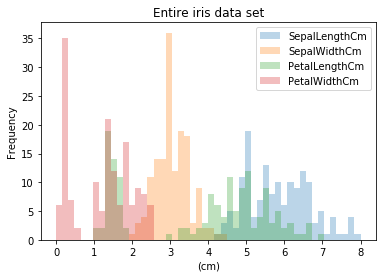

In [77]:
iris.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Entire iris data set')
plt.xlabel('(cm)')
plt.show()

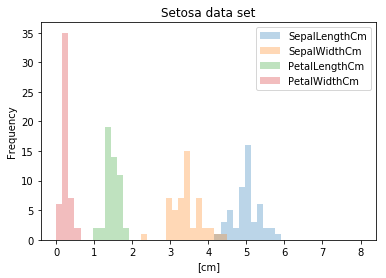

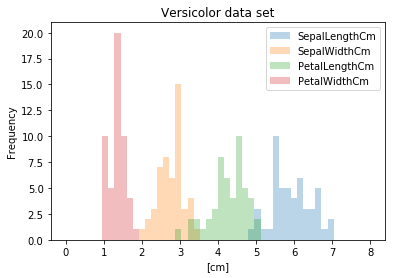

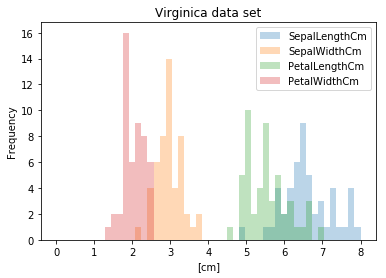

In [86]:
setosa.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Setosa data set')
plt.xlabel('[cm]')

versicolor.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Versicolor data set')
plt.xlabel('[cm]')

virginica.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Virginica data set')
plt.xlabel('[cm]')

plt.show()

In [88]:
describe_all = iris.describe()
describe_all

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4) Computing errors: the petal length & petal width show the greatest errors in using non-separated groups.

In [94]:
error_setosa = 100 * np.abs(setosa.describe() - describe_all)
error_setosa/setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,200.000000,200.000000,200.000000,200.000000
mean,16.726595,10.649503,156.739526,391.256831
std,134.919250,13.796994,916.891608,611.840574
min,0.000000,13.043478,0.000000,0.000000
25%,6.250000,10.400000,14.285714,50.000000
50%,16.000000,11.764706,190.000000,550.000000
75%,23.076923,10.204082,223.809524,500.000000
max,36.206897,0.000000,263.157895,316.666667


# Practice 3

In [95]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,blue,15.0
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,blue,20.0
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,red,10.0
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,blue,15.0
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,green,10.0


### 1) Filtering by origin and return a DataFrame

In [104]:
# method 1
us = auto[auto['origin']=='US']
us.origin.count()

245

In [105]:
us.mean()

mpg         20.033469
cyl          6.277551
displ      247.512245
hp         119.048980
weight    3372.489796
accel       14.990204
yr          75.591837
size        15.693878
dtype: float64

In [108]:
# method 2
us1 = auto.loc[auto.origin=='US', :]
us1.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,blue,15.0
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,blue,20.0
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,blue,15.0
8,15.0,8,302.0,130,4295,14.9,77,US,mercury cougar brougham,blue,20.0
9,17.0,8,302.0,140,3449,10.5,70,US,ford torino,blue,20.0


In [109]:
us1.mean()

mpg         20.033469
cyl          6.277551
displ      247.512245
hp         119.048980
weight    3372.489796
accel       14.990204
yr          75.591837
size        15.693878
dtype: float64

### 2) Separate & plot

In [110]:
tat.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### nrows=3: 3 graphs
### ncols=1: stack on top of each other, 1 columns

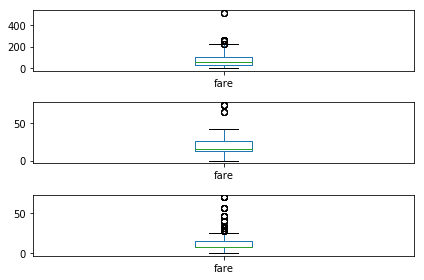

In [118]:
fig, axes = plt.subplots(nrows=3, ncols =1)
tat.loc[tat['pclass']==1,:].plot(ax=axes[0], y='fare', kind='box')
tat.loc[tat['pclass']==2,:].plot(ax=axes[1], y='fare', kind='box')
tat.loc[tat['pclass']==3,:].plot(ax=axes[2], y='fare', kind='box')
plt.tight_layout()
plt.show()